Author:  Raphael Cousin

Project: https://github.com/racousin/algorithms_basics_python

# Theory
we want to find $x^* \in argmin_{x \in K} f(x)$

$K = \mathbb{R}^d$

__Hypothesis:__

(C) $f,K$ convex, $\forall x,y \in K$ : $\lambda x + (1-\lambda) y \in K$ and $f(\lambda x + (1-\lambda) y) \geq  \lambda f(x) + (1-\lambda) f(y)$ whith $\lambda \in [0,1]$

(D) $f$ is differentiable $\forall x,y \in K$ : $f(y) \geq f(x) + \nabla f(x)^T (y - x)$

(G) $f$ is G-Lipschitz $||\nabla f(x)|| \leq G < +\infty$ ie $|f(x) - g(x)| \leq G ||x-y||$

($\alpha$) $f$ is $\alpha$-strongly-convex $\forall x,y\in K$ : $f(y) \geq f(x) + \nabla f(x)^T (y - x) + \frac{\alpha}{2} ||y - x||^2$ (if $f \in C^2$, is equivalent to $\nabla^2 f \leq \alpha I$)

($\beta$) $f$ is $\beta$-smooth $\forall x,y\in K$ : $f(y) \leq f(x) + \nabla f(x)^T (y - x) + \frac{\beta}{2} ||y - x||^2$ (if $f \in C^2$, is equivalent to $\nabla^2 f \geq \beta I$)

($\gamma$) $f$ is $\gamma$-well-conditioned if $f$ is $\beta$-smooth  and $f$ is $\alpha$-strongly-convex, with $\gamma = \frac{\alpha}{\beta}$

__Regularized_Gradient Descent:__

* input:

$f$ Objective function

$T$ Number of iteration

$x_0$ Initialisation

$\overline{\alpha}$ parameter of regularization

* regularization

$g(x) = f(x) + \frac{\overline{\alpha}}{2} ||x - x_0||^2$

* return

Gradient_descent(g,T,x_0,s_t=$\frac{1}{\beta + \overline{\alpha}}$)

__Results:__

g is $\overline{\alpha}$-strongly-convex and $\beta + \overline{\alpha}$-smooth

noting $h_t = f(x_t) - f(x^*)$

assuming (C), (D), (G), and ($\beta$), we have $h_t = O(\frac{\beta \log{t}}{t})$ with $\overline{\alpha} =\frac{\beta \log{t}}{t} $

# Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator
from sklearn.discriminant_analysis import LinearClassifierMixin
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import seaborn as sns
from scipy.misc import derivative

In [2]:
def grad_desc(f,T,x,s):
    its = np.zeros(T+1)
    its[0] = x
    for i,t in enumerate(range(T)):
        x = x - s * derivative(f,x)
        its[i+1] = x
    return x, its

In [17]:
def reg_grad_desc(f,T,x,s,a):
    g = lambda x: f(x) + 0.5*a* (x - x1)**2
    #g = lambda x: f(x) + 0.5*a* (x - x1).dot((x - x1))
    return grad_desc(g,T,x,s)

# Example

In [18]:
f = lambda x: 2 * x**2 -x + 32*np.cos(x)
g = lambda x: f(x) + 0.5*a* (x - x1)**2

In [19]:
xs = np.linspace(-10,10,500)

In [28]:
x1 = -10
a = 2

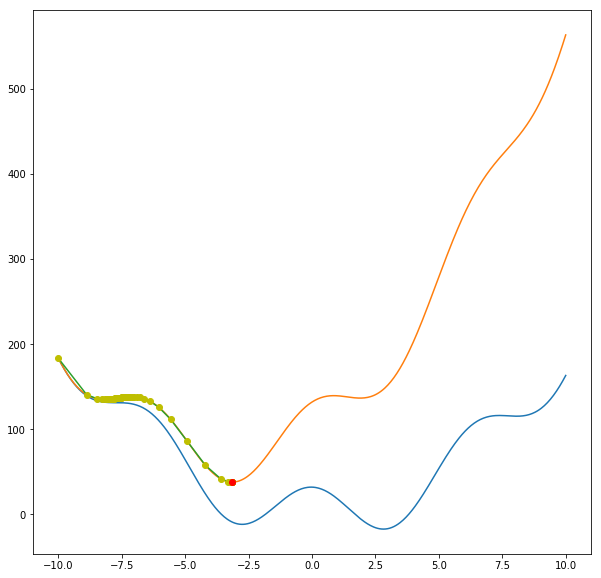

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
xrs, its = reg_grad_desc(f,100,x1,1/50,a)
ax.plot(xs,f(xs))
ax.plot(xs,g(xs))
ax.plot(its,g(its))
ax.plot(its,g(its),'yo')
ax.plot(xrs,g(xrs),'or')